Cross validation with all samples + parameter optimize + methods comparison + ROC

In [78]:
print(__doc__)

import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from time import time
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import cross_validation, linear_model
from sklearn.externals import joblib
%matplotlib inline 

Automatically created module for IPython interactive environment


In [2]:
### STEP 1, import data, here we use the whole set of 151

In [79]:
gut = pd.read_csv('train_valid_test.csv')

In [80]:
type(gut)

pandas.core.frame.DataFrame

In [81]:
X = gut[['Fusobacterium nucleatum_1','Fusobacterium nucleatum_2','Peptostreptococcus stomatis','Porphyromonas','Clostridium symbiosum','Clostridium hylemonae','Phascolarctobacterium succinatutens','unnamed Ruminococcus sp. 5_1_39BFAA','unnamed Ruminococcus sp. SR1/5','Streptococcus salivarius','Bacteroides dorei/vulgatus','Ruminococcus bromii','Bacteroides uniformis','Eubacterium rectale','Prevotella copri','butyrate-producing bacterium','Escherichia coli','Alistipes putredinis','Methanobrevibacter smithii','Parabacteroides distasonis','Faecalibacterium prausnitzii','Eubacterium eligens','Butyrivibrio crossotus','[Ruminococcus] torques','Bacteroides ovatus','Bifidobacterium longum','Faecalibacterium prausnitzii']].values
y = gut['Group'].values

In [6]:
### STEP 2, specify the range for model optimiation via grid or randomized search

In [82]:
# Specify the grid of parameters and distributions to sample from
# This part is for Random Forest
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Specify a classifier

In [83]:
### STEP 3, use nested cross-validation
# Number of random trials
NUM_TRIALS = 5
# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

In [84]:
##### After random Forest Grid Search

#### random forest model
#### Build classifier
rf_cv = RandomForestClassifier(max_depth=None, n_estimators=50, max_features= 4, min_samples_split=8,min_samples_leaf = 5, bootstrap=False, criterion='gini') 
#RF_cv = rf_cv.fit(X, y) #model fitting
## Note:The hyperparameters for this random forest classifier is already based on the randomized search results for all 141 samples


In [12]:
# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "LabelKFold", "LeaveOneOut", "LeaveOneLabelOut", etc.
    inner_cv = KFold(n_splits=10, shuffle=False, random_state=i) ## Inner as 10 fold
    outer_cv = KFold(n_splits=5, shuffle=False, random_state=i) ## Outer as 5 fold
    # Non_nested parameter search and scoring
    gut = RandomizedSearchCV(estimator=rf_cv, param_distributions=param_dist, verbose=2, cv=inner_cv)
    gut.fit(X, y)
    non_nested_scores[i] = gut.best_score_
    # Nested CV with parameter optimization
    nested_score = cross_val_score(gut, X=X, y=y, cv=outer_cv)
    nested_scores[i] = nested_score.mean()
score_difference = non_nested_scores - nested_scores

print("Average difference of {0:6f} with std. dev. of {1:6f}."
      .format(score_difference.mean(), score_difference.std()))
###Average difference of 0.009744 with std. dev. of 0.006999.

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] bootstrap=True, min_samples_leaf=1, min_samples_split=6, criterion=entropy, max_features=6, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=1, min_samples_split=6, criterion=entropy, max_features=6, max_depth=None, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=1, min_samples_split=6, criterion=entropy, max_features=6, max_depth=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  bootstrap=True, min_samples_leaf=1, min_samples_split=6, criterion=entropy, max_features=6, max_depth=None, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=1, min_samples_split=6, criterion=entropy, max_features=6, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=1, min_samples_split=6, criterion=entropy, max_features=6, max_depth=None, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=1, min_samples_split=6, criterion=entropy, max_features=6, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=1, min_samples_split=6, criterion=entropy, max_features=6, max_depth=None, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=1, min_samples_split=6, criterion=entropy, max_features=6, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=1, min_samples_split=6, criterion=entropy, max_features=6, max_depth=None, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=1, min_samples_split=6, criterion=entropy, max_features=6, max_depth=None 
[CV]  bootstrap=True, min_samples_le

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   30.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] bootstrap=True, min_samples_leaf=10, min_samples_split=2, criterion=gini, max_features=7, max_depth=3 
[CV]  bootstrap=True, min_samples_leaf=10, min_samples_split=2, criterion=gini, max_features=7, max_depth=3, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=10, min_samples_split=2, criterion=gini, max_features=7, max_depth=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  bootstrap=True, min_samples_leaf=10, min_samples_split=2, criterion=gini, max_features=7, max_depth=3, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=10, min_samples_split=2, criterion=gini, max_features=7, max_depth=3 
[CV]  bootstrap=True, min_samples_leaf=10, min_samples_split=2, criterion=gini, max_features=7, max_depth=3, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=10, min_samples_split=2, criterion=gini, max_features=7, max_depth=3 
[CV]  bootstrap=True, min_samples_leaf=10, min_samples_split=2, criterion=gini, max_features=7, max_depth=3, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=10, min_samples_split=2, criterion=gini, max_features=7, max_depth=3 
[CV]  bootstrap=True, min_samples_leaf=10, min_samples_split=2, criterion=gini, max_features=7, max_depth=3, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=10, min_samples_split=2, criterion=gini, max_features=7, max_depth=3 
[CV]  bootstrap=True, min_samples_leaf=10, min_samples_split=2, criterion=gi

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   30.4s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] bootstrap=True, min_samples_leaf=3, min_samples_split=5, criterion=entropy, max_features=9, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=3, min_samples_split=5, criterion=entropy, max_features=9, max_depth=None, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=3, min_samples_split=5, criterion=entropy, max_features=9, max_depth=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  bootstrap=True, min_samples_leaf=3, min_samples_split=5, criterion=entropy, max_features=9, max_depth=None, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=3, min_samples_split=5, criterion=entropy, max_features=9, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=3, min_samples_split=5, criterion=entropy, max_features=9, max_depth=None, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=3, min_samples_split=5, criterion=entropy, max_features=9, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=3, min_samples_split=5, criterion=entropy, max_features=9, max_depth=None, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=3, min_samples_split=5, criterion=entropy, max_features=9, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=3, min_samples_split=5, criterion=entropy, max_features=9, max_depth=None, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=3, min_samples_split=5, criterion=entropy, max_features=9, max_depth=None 
[CV]  bootstrap=True, min_samples_le

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   25.8s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] bootstrap=True, min_samples_leaf=7, min_samples_split=5, criterion=gini, max_features=10, max_depth=3 
[CV]  bootstrap=True, min_samples_leaf=7, min_samples_split=5, criterion=gini, max_features=10, max_depth=3, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=7, min_samples_split=5, criterion=gini, max_features=10, max_depth=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  bootstrap=True, min_samples_leaf=7, min_samples_split=5, criterion=gini, max_features=10, max_depth=3, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=7, min_samples_split=5, criterion=gini, max_features=10, max_depth=3 
[CV]  bootstrap=True, min_samples_leaf=7, min_samples_split=5, criterion=gini, max_features=10, max_depth=3, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=7, min_samples_split=5, criterion=gini, max_features=10, max_depth=3 
[CV]  bootstrap=True, min_samples_leaf=7, min_samples_split=5, criterion=gini, max_features=10, max_depth=3, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=7, min_samples_split=5, criterion=gini, max_features=10, max_depth=3 
[CV]  bootstrap=True, min_samples_leaf=7, min_samples_split=5, criterion=gini, max_features=10, max_depth=3, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=7, min_samples_split=5, criterion=gini, max_features=10, max_depth=3 
[CV]  bootstrap=True, min_samples_leaf=7, min_samples_split=5, criterion=gin

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   25.5s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] bootstrap=False, min_samples_leaf=5, min_samples_split=6, criterion=entropy, max_features=2, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=5, min_samples_split=6, criterion=entropy, max_features=2, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=5, min_samples_split=6, criterion=entropy, max_features=2, max_depth=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  bootstrap=False, min_samples_leaf=5, min_samples_split=6, criterion=entropy, max_features=2, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=5, min_samples_split=6, criterion=entropy, max_features=2, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=5, min_samples_split=6, criterion=entropy, max_features=2, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=5, min_samples_split=6, criterion=entropy, max_features=2, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=5, min_samples_split=6, criterion=entropy, max_features=2, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=5, min_samples_split=6, criterion=entropy, max_features=2, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=5, min_samples_split=6, criterion=entropy, max_features=2, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=5, min_samples_split=6, criterion=entropy, max_features=2, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=5, min_sampl

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   29.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] bootstrap=False, min_samples_leaf=7, min_samples_split=3, criterion=gini, max_features=4, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=7, min_samples_split=3, criterion=gini, max_features=4, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=7, min_samples_split=3, criterion=gini, max_features=4, max_depth=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  bootstrap=False, min_samples_leaf=7, min_samples_split=3, criterion=gini, max_features=4, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=7, min_samples_split=3, criterion=gini, max_features=4, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=7, min_samples_split=3, criterion=gini, max_features=4, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=7, min_samples_split=3, criterion=gini, max_features=4, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=7, min_samples_split=3, criterion=gini, max_features=4, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=7, min_samples_split=3, criterion=gini, max_features=4, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=7, min_samples_split=3, criterion=gini, max_features=4, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=7, min_samples_split=3, criterion=gini, max_features=4, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=7, min_samples_split=3, criterion=gi

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   26.6s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] bootstrap=False, min_samples_leaf=10, min_samples_split=5, criterion=entropy, max_features=2, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=10, min_samples_split=5, criterion=entropy, max_features=2, max_depth=None, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=10, min_samples_split=5, criterion=entropy, max_features=2, max_depth=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  bootstrap=False, min_samples_leaf=10, min_samples_split=5, criterion=entropy, max_features=2, max_depth=None, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=10, min_samples_split=5, criterion=entropy, max_features=2, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=10, min_samples_split=5, criterion=entropy, max_features=2, max_depth=None, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=10, min_samples_split=5, criterion=entropy, max_features=2, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=10, min_samples_split=5, criterion=entropy, max_features=2, max_depth=None, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=10, min_samples_split=5, criterion=entropy, max_features=2, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=10, min_samples_split=5, criterion=entropy, max_features=2, max_depth=None, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=10, min_samples_split=5, criterion=entropy, max_features=2, max_depth=None 
[CV]  bootstrap=Fals

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   25.3s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] bootstrap=False, min_samples_leaf=4, min_samples_split=5, criterion=entropy, max_features=5, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=4, min_samples_split=5, criterion=entropy, max_features=5, max_depth=None, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=4, min_samples_split=5, criterion=entropy, max_features=5, max_depth=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  bootstrap=False, min_samples_leaf=4, min_samples_split=5, criterion=entropy, max_features=5, max_depth=None, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=4, min_samples_split=5, criterion=entropy, max_features=5, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=4, min_samples_split=5, criterion=entropy, max_features=5, max_depth=None, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=4, min_samples_split=5, criterion=entropy, max_features=5, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=4, min_samples_split=5, criterion=entropy, max_features=5, max_depth=None, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=4, min_samples_split=5, criterion=entropy, max_features=5, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=4, min_samples_split=5, criterion=entropy, max_features=5, max_depth=None, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=4, min_samples_split=5, criterion=entropy, max_features=5, max_depth=None 
[CV]  bootstrap=False, min_s

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   26.6s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] bootstrap=False, min_samples_leaf=4, min_samples_split=2, criterion=entropy, max_features=7, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=4, min_samples_split=2, criterion=entropy, max_features=7, max_depth=None, total=   0.3s
[CV] bootstrap=False, min_samples_leaf=4, min_samples_split=2, criterion=entropy, max_features=7, max_depth=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  bootstrap=False, min_samples_leaf=4, min_samples_split=2, criterion=entropy, max_features=7, max_depth=None, total=   0.3s
[CV] bootstrap=False, min_samples_leaf=4, min_samples_split=2, criterion=entropy, max_features=7, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=4, min_samples_split=2, criterion=entropy, max_features=7, max_depth=None, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=4, min_samples_split=2, criterion=entropy, max_features=7, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=4, min_samples_split=2, criterion=entropy, max_features=7, max_depth=None, total=   0.3s
[CV] bootstrap=False, min_samples_leaf=4, min_samples_split=2, criterion=entropy, max_features=7, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=4, min_samples_split=2, criterion=entropy, max_features=7, max_depth=None, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=4, min_samples_split=2, criterion=entropy, max_features=7, max_depth=None 
[CV]  bootstrap=False, min_s

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   25.6s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] bootstrap=True, min_samples_leaf=5, min_samples_split=5, criterion=entropy, max_features=6, max_depth=3 
[CV]  bootstrap=True, min_samples_leaf=5, min_samples_split=5, criterion=entropy, max_features=6, max_depth=3, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=5, min_samples_split=5, criterion=entropy, max_features=6, max_depth=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  bootstrap=True, min_samples_leaf=5, min_samples_split=5, criterion=entropy, max_features=6, max_depth=3, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=5, min_samples_split=5, criterion=entropy, max_features=6, max_depth=3 
[CV]  bootstrap=True, min_samples_leaf=5, min_samples_split=5, criterion=entropy, max_features=6, max_depth=3, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=5, min_samples_split=5, criterion=entropy, max_features=6, max_depth=3 
[CV]  bootstrap=True, min_samples_leaf=5, min_samples_split=5, criterion=entropy, max_features=6, max_depth=3, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=5, min_samples_split=5, criterion=entropy, max_features=6, max_depth=3 
[CV]  bootstrap=True, min_samples_leaf=5, min_samples_split=5, criterion=entropy, max_features=6, max_depth=3, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=5, min_samples_split=5, criterion=entropy, max_features=6, max_depth=3 
[CV]  bootstrap=True, min_samples_leaf=5, min_samples_split=

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   25.5s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] bootstrap=False, min_samples_leaf=1, min_samples_split=7, criterion=gini, max_features=1, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=1, min_samples_split=7, criterion=gini, max_features=1, max_depth=None, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=1, min_samples_split=7, criterion=gini, max_features=1, max_depth=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  bootstrap=False, min_samples_leaf=1, min_samples_split=7, criterion=gini, max_features=1, max_depth=None, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=1, min_samples_split=7, criterion=gini, max_features=1, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=1, min_samples_split=7, criterion=gini, max_features=1, max_depth=None, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=1, min_samples_split=7, criterion=gini, max_features=1, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=1, min_samples_split=7, criterion=gini, max_features=1, max_depth=None, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=1, min_samples_split=7, criterion=gini, max_features=1, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=1, min_samples_split=7, criterion=gini, max_features=1, max_depth=None, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=1, min_samples_split=7, criterion=gini, max_features=1, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=1, min_sampl

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   24.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] bootstrap=True, min_samples_leaf=4, min_samples_split=9, criterion=gini, max_features=6, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=4, min_samples_split=9, criterion=gini, max_features=6, max_depth=None, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=4, min_samples_split=9, criterion=gini, max_features=6, max_depth=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  bootstrap=True, min_samples_leaf=4, min_samples_split=9, criterion=gini, max_features=6, max_depth=None, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=4, min_samples_split=9, criterion=gini, max_features=6, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=4, min_samples_split=9, criterion=gini, max_features=6, max_depth=None, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=4, min_samples_split=9, criterion=gini, max_features=6, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=4, min_samples_split=9, criterion=gini, max_features=6, max_depth=None, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=4, min_samples_split=9, criterion=gini, max_features=6, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=4, min_samples_split=9, criterion=gini, max_features=6, max_depth=None, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=4, min_samples_split=9, criterion=gini, max_features=6, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=4, min_samples_split=

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   24.6s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] bootstrap=True, min_samples_leaf=5, min_samples_split=2, criterion=entropy, max_features=4, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=5, min_samples_split=2, criterion=entropy, max_features=4, max_depth=None, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=5, min_samples_split=2, criterion=entropy, max_features=4, max_depth=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  bootstrap=True, min_samples_leaf=5, min_samples_split=2, criterion=entropy, max_features=4, max_depth=None, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=5, min_samples_split=2, criterion=entropy, max_features=4, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=5, min_samples_split=2, criterion=entropy, max_features=4, max_depth=None, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=5, min_samples_split=2, criterion=entropy, max_features=4, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=5, min_samples_split=2, criterion=entropy, max_features=4, max_depth=None, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=5, min_samples_split=2, criterion=entropy, max_features=4, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=5, min_samples_split=2, criterion=entropy, max_features=4, max_depth=None, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=5, min_samples_split=2, criterion=entropy, max_features=4, max_depth=None 
[CV]  bootstrap=True, min_samples_le

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.3min finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] bootstrap=False, min_samples_leaf=4, min_samples_split=5, criterion=entropy, max_features=5, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=4, min_samples_split=5, criterion=entropy, max_features=5, max_depth=3, total=   0.3s
[CV] bootstrap=False, min_samples_leaf=4, min_samples_split=5, criterion=entropy, max_features=5, max_depth=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  bootstrap=False, min_samples_leaf=4, min_samples_split=5, criterion=entropy, max_features=5, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=4, min_samples_split=5, criterion=entropy, max_features=5, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=4, min_samples_split=5, criterion=entropy, max_features=5, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=4, min_samples_split=5, criterion=entropy, max_features=5, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=4, min_samples_split=5, criterion=entropy, max_features=5, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=4, min_samples_split=5, criterion=entropy, max_features=5, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=4, min_samples_split=5, criterion=entropy, max_features=5, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=4, min_samples_split=5, criterion=entropy, max_features=5, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=4, min_sampl

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   26.6s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] bootstrap=True, min_samples_leaf=6, min_samples_split=6, criterion=entropy, max_features=5, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=6, min_samples_split=6, criterion=entropy, max_features=5, max_depth=None, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=6, min_samples_split=6, criterion=entropy, max_features=5, max_depth=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  bootstrap=True, min_samples_leaf=6, min_samples_split=6, criterion=entropy, max_features=5, max_depth=None, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=6, min_samples_split=6, criterion=entropy, max_features=5, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=6, min_samples_split=6, criterion=entropy, max_features=5, max_depth=None, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=6, min_samples_split=6, criterion=entropy, max_features=5, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=6, min_samples_split=6, criterion=entropy, max_features=5, max_depth=None, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=6, min_samples_split=6, criterion=entropy, max_features=5, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=6, min_samples_split=6, criterion=entropy, max_features=5, max_depth=None, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=6, min_samples_split=6, criterion=entropy, max_features=5, max_depth=None 
[CV]  bootstrap=True, min_samples_le

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   26.1s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] bootstrap=True, min_samples_leaf=2, min_samples_split=5, criterion=gini, max_features=5, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=2, min_samples_split=5, criterion=gini, max_features=5, max_depth=None, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=2, min_samples_split=5, criterion=gini, max_features=5, max_depth=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  bootstrap=True, min_samples_leaf=2, min_samples_split=5, criterion=gini, max_features=5, max_depth=None, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=2, min_samples_split=5, criterion=gini, max_features=5, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=2, min_samples_split=5, criterion=gini, max_features=5, max_depth=None, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=2, min_samples_split=5, criterion=gini, max_features=5, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=2, min_samples_split=5, criterion=gini, max_features=5, max_depth=None, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=2, min_samples_split=5, criterion=gini, max_features=5, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=2, min_samples_split=5, criterion=gini, max_features=5, max_depth=None, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=2, min_samples_split=5, criterion=gini, max_features=5, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=2, min_samples_split=

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   26.3s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] bootstrap=False, min_samples_leaf=5, min_samples_split=7, criterion=entropy, max_features=6, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=5, min_samples_split=7, criterion=entropy, max_features=6, max_depth=None, total=   0.3s
[CV] bootstrap=False, min_samples_leaf=5, min_samples_split=7, criterion=entropy, max_features=6, max_depth=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  bootstrap=False, min_samples_leaf=5, min_samples_split=7, criterion=entropy, max_features=6, max_depth=None, total=   0.3s
[CV] bootstrap=False, min_samples_leaf=5, min_samples_split=7, criterion=entropy, max_features=6, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=5, min_samples_split=7, criterion=entropy, max_features=6, max_depth=None, total=   0.3s
[CV] bootstrap=False, min_samples_leaf=5, min_samples_split=7, criterion=entropy, max_features=6, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=5, min_samples_split=7, criterion=entropy, max_features=6, max_depth=None, total=   0.3s
[CV] bootstrap=False, min_samples_leaf=5, min_samples_split=7, criterion=entropy, max_features=6, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=5, min_samples_split=7, criterion=entropy, max_features=6, max_depth=None, total=   0.3s
[CV] bootstrap=False, min_samples_leaf=5, min_samples_split=7, criterion=entropy, max_features=6, max_depth=None 
[CV]  bootstrap=False, min_s

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   28.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] bootstrap=True, min_samples_leaf=4, min_samples_split=4, criterion=gini, max_features=8, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=4, min_samples_split=4, criterion=gini, max_features=8, max_depth=None, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=4, min_samples_split=4, criterion=gini, max_features=8, max_depth=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  bootstrap=True, min_samples_leaf=4, min_samples_split=4, criterion=gini, max_features=8, max_depth=None, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=4, min_samples_split=4, criterion=gini, max_features=8, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=4, min_samples_split=4, criterion=gini, max_features=8, max_depth=None, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=4, min_samples_split=4, criterion=gini, max_features=8, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=4, min_samples_split=4, criterion=gini, max_features=8, max_depth=None, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=4, min_samples_split=4, criterion=gini, max_features=8, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=4, min_samples_split=4, criterion=gini, max_features=8, max_depth=None, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=4, min_samples_split=4, criterion=gini, max_features=8, max_depth=None 
[CV]  bootstrap=True, min_samples_leaf=4, min_samples_split=

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   24.5s finished



[CV] bootstrap=False, min_samples_leaf=1, min_samples_split=6, criterion=entropy, max_features=3, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=1, min_samples_split=6, criterion=entropy, max_features=3, max_depth=None, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=1, min_samples_split=6, criterion=entropy, max_features=3, max_depth=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  bootstrap=False, min_samples_leaf=1, min_samples_split=6, criterion=entropy, max_features=3, max_depth=None, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=1, min_samples_split=6, criterion=entropy, max_features=3, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=1, min_samples_split=6, criterion=entropy, max_features=3, max_depth=None, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=1, min_samples_split=6, criterion=entropy, max_features=3, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=1, min_samples_split=6, criterion=entropy, max_features=3, max_depth=None, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=1, min_samples_split=6, criterion=entropy, max_features=3, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=1, min_samples_split=6, criterion=entropy, max_features=3, max_depth=None, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=1, min_samples_split=6, criterion=entropy, max_features=3, max_depth=None 
[CV]  bootstrap=False, min_s

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   24.8s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] bootstrap=False, min_samples_leaf=6, min_samples_split=4, criterion=gini, max_features=1, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=6, min_samples_split=4, criterion=gini, max_features=1, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=6, min_samples_split=4, criterion=gini, max_features=1, max_depth=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  bootstrap=False, min_samples_leaf=6, min_samples_split=4, criterion=gini, max_features=1, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=6, min_samples_split=4, criterion=gini, max_features=1, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=6, min_samples_split=4, criterion=gini, max_features=1, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=6, min_samples_split=4, criterion=gini, max_features=1, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=6, min_samples_split=4, criterion=gini, max_features=1, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=6, min_samples_split=4, criterion=gini, max_features=1, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=6, min_samples_split=4, criterion=gini, max_features=1, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=6, min_samples_split=4, criterion=gini, max_features=1, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=6, min_samples_split=4, criterion=gi

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   24.4s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] bootstrap=True, min_samples_leaf=7, min_samples_split=2, criterion=gini, max_features=6, max_depth=3 
[CV]  bootstrap=True, min_samples_leaf=7, min_samples_split=2, criterion=gini, max_features=6, max_depth=3, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=7, min_samples_split=2, criterion=gini, max_features=6, max_depth=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  bootstrap=True, min_samples_leaf=7, min_samples_split=2, criterion=gini, max_features=6, max_depth=3, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=7, min_samples_split=2, criterion=gini, max_features=6, max_depth=3 
[CV]  bootstrap=True, min_samples_leaf=7, min_samples_split=2, criterion=gini, max_features=6, max_depth=3, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=7, min_samples_split=2, criterion=gini, max_features=6, max_depth=3 
[CV]  bootstrap=True, min_samples_leaf=7, min_samples_split=2, criterion=gini, max_features=6, max_depth=3, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=7, min_samples_split=2, criterion=gini, max_features=6, max_depth=3 
[CV]  bootstrap=True, min_samples_leaf=7, min_samples_split=2, criterion=gini, max_features=6, max_depth=3, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=7, min_samples_split=2, criterion=gini, max_features=6, max_depth=3 
[CV]  bootstrap=True, min_samples_leaf=7, min_samples_split=2, criterion=gini, max_f

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   24.6s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] bootstrap=True, min_samples_leaf=3, min_samples_split=2, criterion=entropy, max_features=10, max_depth=3 
[CV]  bootstrap=True, min_samples_leaf=3, min_samples_split=2, criterion=entropy, max_features=10, max_depth=3, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=3, min_samples_split=2, criterion=entropy, max_features=10, max_depth=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  bootstrap=True, min_samples_leaf=3, min_samples_split=2, criterion=entropy, max_features=10, max_depth=3, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=3, min_samples_split=2, criterion=entropy, max_features=10, max_depth=3 
[CV]  bootstrap=True, min_samples_leaf=3, min_samples_split=2, criterion=entropy, max_features=10, max_depth=3, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=3, min_samples_split=2, criterion=entropy, max_features=10, max_depth=3 
[CV]  bootstrap=True, min_samples_leaf=3, min_samples_split=2, criterion=entropy, max_features=10, max_depth=3, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=3, min_samples_split=2, criterion=entropy, max_features=10, max_depth=3 
[CV]  bootstrap=True, min_samples_leaf=3, min_samples_split=2, criterion=entropy, max_features=10, max_depth=3, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=3, min_samples_split=2, criterion=entropy, max_features=10, max_depth=3 
[CV]  bootstrap=True, min_samples_leaf=3, min_sample

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   25.2s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] bootstrap=False, min_samples_leaf=2, min_samples_split=8, criterion=entropy, max_features=4, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=2, min_samples_split=8, criterion=entropy, max_features=4, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=2, min_samples_split=8, criterion=entropy, max_features=4, max_depth=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  bootstrap=False, min_samples_leaf=2, min_samples_split=8, criterion=entropy, max_features=4, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=2, min_samples_split=8, criterion=entropy, max_features=4, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=2, min_samples_split=8, criterion=entropy, max_features=4, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=2, min_samples_split=8, criterion=entropy, max_features=4, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=2, min_samples_split=8, criterion=entropy, max_features=4, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=2, min_samples_split=8, criterion=entropy, max_features=4, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=2, min_samples_split=8, criterion=entropy, max_features=4, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=2, min_samples_split=8, criterion=entropy, max_features=4, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=2, min_sampl

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   24.8s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] bootstrap=False, min_samples_leaf=10, min_samples_split=4, criterion=gini, max_features=9, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=10, min_samples_split=4, criterion=gini, max_features=9, max_depth=None, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=10, min_samples_split=4, criterion=gini, max_features=9, max_depth=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  bootstrap=False, min_samples_leaf=10, min_samples_split=4, criterion=gini, max_features=9, max_depth=None, total=   0.3s
[CV] bootstrap=False, min_samples_leaf=10, min_samples_split=4, criterion=gini, max_features=9, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=10, min_samples_split=4, criterion=gini, max_features=9, max_depth=None, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=10, min_samples_split=4, criterion=gini, max_features=9, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=10, min_samples_split=4, criterion=gini, max_features=9, max_depth=None, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=10, min_samples_split=4, criterion=gini, max_features=9, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=10, min_samples_split=4, criterion=gini, max_features=9, max_depth=None, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=10, min_samples_split=4, criterion=gini, max_features=9, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=10, 

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   57.8s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] bootstrap=False, min_samples_leaf=10, min_samples_split=3, criterion=gini, max_features=6, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=10, min_samples_split=3, criterion=gini, max_features=6, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=10, min_samples_split=3, criterion=gini, max_features=6, max_depth=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  bootstrap=False, min_samples_leaf=10, min_samples_split=3, criterion=gini, max_features=6, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=10, min_samples_split=3, criterion=gini, max_features=6, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=10, min_samples_split=3, criterion=gini, max_features=6, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=10, min_samples_split=3, criterion=gini, max_features=6, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=10, min_samples_split=3, criterion=gini, max_features=6, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=10, min_samples_split=3, criterion=gini, max_features=6, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=10, min_samples_split=3, criterion=gini, max_features=6, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=10, min_samples_split=3, criterion=gini, max_features=6, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=10, min_samples_split=3, cri

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   27.8s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] bootstrap=False, min_samples_leaf=7, min_samples_split=2, criterion=gini, max_features=2, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=7, min_samples_split=2, criterion=gini, max_features=2, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=7, min_samples_split=2, criterion=gini, max_features=2, max_depth=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  bootstrap=False, min_samples_leaf=7, min_samples_split=2, criterion=gini, max_features=2, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=7, min_samples_split=2, criterion=gini, max_features=2, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=7, min_samples_split=2, criterion=gini, max_features=2, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=7, min_samples_split=2, criterion=gini, max_features=2, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=7, min_samples_split=2, criterion=gini, max_features=2, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=7, min_samples_split=2, criterion=gini, max_features=2, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=7, min_samples_split=2, criterion=gini, max_features=2, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=7, min_samples_split=2, criterion=gini, max_features=2, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=7, min_samples_split=2, criterion=gi

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   29.7s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] bootstrap=False, min_samples_leaf=6, min_samples_split=8, criterion=entropy, max_features=2, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=6, min_samples_split=8, criterion=entropy, max_features=2, max_depth=None, total=   0.3s
[CV] bootstrap=False, min_samples_leaf=6, min_samples_split=8, criterion=entropy, max_features=2, max_depth=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  bootstrap=False, min_samples_leaf=6, min_samples_split=8, criterion=entropy, max_features=2, max_depth=None, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=6, min_samples_split=8, criterion=entropy, max_features=2, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=6, min_samples_split=8, criterion=entropy, max_features=2, max_depth=None, total=   0.4s
[CV] bootstrap=False, min_samples_leaf=6, min_samples_split=8, criterion=entropy, max_features=2, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=6, min_samples_split=8, criterion=entropy, max_features=2, max_depth=None, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=6, min_samples_split=8, criterion=entropy, max_features=2, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=6, min_samples_split=8, criterion=entropy, max_features=2, max_depth=None, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=6, min_samples_split=8, criterion=entropy, max_features=2, max_depth=None 
[CV]  bootstrap=False, min_s

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   27.0s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] bootstrap=False, min_samples_leaf=8, min_samples_split=10, criterion=entropy, max_features=9, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=8, min_samples_split=10, criterion=entropy, max_features=9, max_depth=None, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=8, min_samples_split=10, criterion=entropy, max_features=9, max_depth=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  bootstrap=False, min_samples_leaf=8, min_samples_split=10, criterion=entropy, max_features=9, max_depth=None, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=8, min_samples_split=10, criterion=entropy, max_features=9, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=8, min_samples_split=10, criterion=entropy, max_features=9, max_depth=None, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=8, min_samples_split=10, criterion=entropy, max_features=9, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=8, min_samples_split=10, criterion=entropy, max_features=9, max_depth=None, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=8, min_samples_split=10, criterion=entropy, max_features=9, max_depth=None 
[CV]  bootstrap=False, min_samples_leaf=8, min_samples_split=10, criterion=entropy, max_features=9, max_depth=None, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=8, min_samples_split=10, criterion=entropy, max_features=9, max_depth=None 
[CV]  bootstrap=Fals

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   25.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] bootstrap=True, min_samples_leaf=10, min_samples_split=2, criterion=entropy, max_features=6, max_depth=3 
[CV]  bootstrap=True, min_samples_leaf=10, min_samples_split=2, criterion=entropy, max_features=6, max_depth=3, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=10, min_samples_split=2, criterion=entropy, max_features=6, max_depth=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  bootstrap=True, min_samples_leaf=10, min_samples_split=2, criterion=entropy, max_features=6, max_depth=3, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=10, min_samples_split=2, criterion=entropy, max_features=6, max_depth=3 
[CV]  bootstrap=True, min_samples_leaf=10, min_samples_split=2, criterion=entropy, max_features=6, max_depth=3, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=10, min_samples_split=2, criterion=entropy, max_features=6, max_depth=3 
[CV]  bootstrap=True, min_samples_leaf=10, min_samples_split=2, criterion=entropy, max_features=6, max_depth=3, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=10, min_samples_split=2, criterion=entropy, max_features=6, max_depth=3 
[CV]  bootstrap=True, min_samples_leaf=10, min_samples_split=2, criterion=entropy, max_features=6, max_depth=3, total=   0.2s
[CV] bootstrap=True, min_samples_leaf=10, min_samples_split=2, criterion=entropy, max_features=6, max_depth=3 
[CV]  bootstrap=True, min_samples_leaf=10, min_sampl

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   27.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] bootstrap=False, min_samples_leaf=8, min_samples_split=7, criterion=entropy, max_features=5, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=8, min_samples_split=7, criterion=entropy, max_features=5, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=8, min_samples_split=7, criterion=entropy, max_features=5, max_depth=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  bootstrap=False, min_samples_leaf=8, min_samples_split=7, criterion=entropy, max_features=5, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=8, min_samples_split=7, criterion=entropy, max_features=5, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=8, min_samples_split=7, criterion=entropy, max_features=5, max_depth=3, total=   0.3s
[CV] bootstrap=False, min_samples_leaf=8, min_samples_split=7, criterion=entropy, max_features=5, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=8, min_samples_split=7, criterion=entropy, max_features=5, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=8, min_samples_split=7, criterion=entropy, max_features=5, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=8, min_samples_split=7, criterion=entropy, max_features=5, max_depth=3, total=   0.2s
[CV] bootstrap=False, min_samples_leaf=8, min_samples_split=7, criterion=entropy, max_features=5, max_depth=3 
[CV]  bootstrap=False, min_samples_leaf=8, min_sampl

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   26.1s finished


Average difference of 0.009744 with std. dev. of 0.006999.


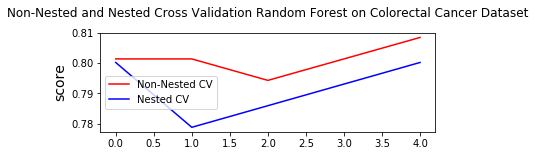

In [18]:
# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation Random Forest on Colorectal Cancer Dataset",
          x=.5, y=1.1, fontsize="12")

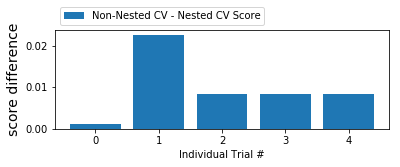

In [19]:
# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")

plt.show()

In [ ]:
# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on Iris Dataset",
          x=.5, y=1.1, fontsize="15")


In [ ]:
# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")

plt.show()

In [34]:
### Set up 10-fold cross validation
import numpy as np
from sklearn.model_selection import KFold

loo = cross_validation.LeaveOneOut(X.shape[0])
kf = KFold(n_splits=10)
kf.split(X)

<generator object split at 0x118754aa0>

In [41]:
#### Random forest Randomized search
## Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            


In [85]:
# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(rf_cv, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 14.38 seconds for 20 candidates parameter settings.


NameError: name 'report' is not defined

In [ ]:
##########################################
######## Compare between models###########

In [87]:
####Logistics Regressor
from sklearn.linear_model import LogisticRegression
cv = cross_validation.ShuffleSplit(len(y), n_iter=100,test_size=0.2)

logistic = linear_model.LogisticRegression()
scores_logistic = cross_validation.cross_val_score(logistic,X, y, cv=cv)
scores_logistic.mean(), scores_logistic.std()

(0.61758620689655164, 0.071686827165530501)

In [89]:
####Linear SVC
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

C=1.0
linSVC = svm.LinearSVC(C=C).fit(X, y)


scores_linSVC = cross_validation.cross_val_score(linSVC,X, y, cv=cv)
scores_linSVC.mean(), scores_linSVC.std()

(0.62344827586206897, 0.080379598810115666)

In [91]:
## Try Nearest Neighbors with X2 ##
## Nearest neighbors classifier -> KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
Neigh = neigh.fit(X, y) 

scores_Neigh = cross_validation.cross_val_score(Neigh,X, y, cv=cv)
scores_Neigh.mean(), scores_Neigh.std()

(0.65034482758620682, 0.080872177884405622)

In [92]:
## Try random forest with X2 ##
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
RFgut = rf_cv.fit(X, y)

scores_RFgut = cross_validation.cross_val_score(RFgut,X, y, cv=cv)
scores_RFgut.mean(), scores_RFgut.std()

(0.79344827586206923, 0.066596375944504183)

/Users/zybell/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


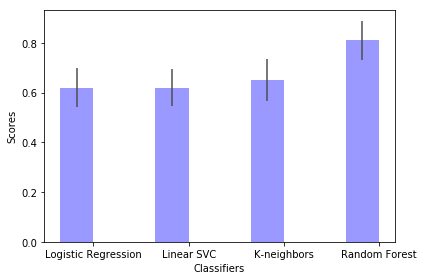

In [62]:
import numpy as np
import matplotlib.pyplot as plt


n_groups = 4

mean = (0.62, 0.62, 0.65, 0.81)
std = (0.079,0.075,0.084,0.078)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, mean, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=std,
                 error_kw=error_config)

plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.xticks(index + bar_width / 2, ('Logistic Regression', 'Linear SVC', 'K-neighbors', 'Random Forest'))
plt.legend()

plt.tight_layout()
plt.show()

In [95]:
###### Performance training cutoff
### Performance evaluation for test data with the turned-up  cutoff


### First play with the 0.5 cutoff
cancer_chance = RFgut.predict_proba(X)[:,0]
print cancer_chance
cancer_bin_l = []
for x in np.nditer(cancer_chance):
    if x > 0.5:
        z = 0
    else:
        z = 1
    cancer_bin_l.append(z)
import numpy as np
cancer_predict = np.asarray(cancer_bin_l)
print cancer_predict
print y

[ 0.88230952  0.92942857  0.91220635  0.18372222  0.95860317  0.91096825
  0.77212698  0.8432381   0.13296032  0.93992063  0.92575397  0.86847619
  0.93492063  0.98305556  0.9434127   0.94703175  0.15546032  0.89380952
  0.93309524  0.88506349  0.3671746   0.19131746  0.82678571  0.09325397
  0.16316667  0.92793651  0.75838889  0.91410317  0.87331746  0.19977778
  0.63543651  0.98592063  0.37961905  0.29884921  0.93879365  0.13469048
  0.933       0.11516667  0.45470635  0.69104762  0.828       0.88301587
  0.67711905  0.91434921  0.90650794  0.88197619  0.90380952  0.09116667
  0.10269841  0.89444444  0.97120635  0.12827778  0.93590476  0.64779365
  0.91200794  0.11945238  0.07512698  0.49307937  0.25665873  0.18853175
  0.88734127  0.90792063  0.76285714  0.94722222  0.87092063  0.21184921
  0.87888095  0.92044444  0.12000794  0.4732619   0.44523016  0.91769048
  0.55420635  0.94868254  0.51703968  0.88725397  0.2725873   0.88801587
  0.79640476  0.91102381  0.97677778  0.19913492  0

In [100]:
# acc for 0.5 cutoff 
#gut = pd.read_csv('train_valid_test.csv')
#X = gut[['Fusobacterium nucleatum_1','Fusobacterium nucleatum_2','Peptostreptococcus stomatis','Porphyromonas','Clostridium symbiosum','Clostridium hylemonae','Phascolarctobacterium succinatutens','unnamed Ruminococcus sp. 5_1_39BFAA','unnamed Ruminococcus sp. SR1/5','Streptococcus salivarius','Bacteroides dorei/vulgatus','Ruminococcus bromii','Bacteroides uniformis','Eubacterium rectale','Prevotella copri','butyrate-producing bacterium','Escherichia coli','Alistipes putredinis','Methanobrevibacter smithii','Parabacteroides distasonis','Faecalibacterium prausnitzii','Eubacterium eligens','Butyrivibrio crossotus','[Ruminococcus] torques','Bacteroides ovatus','Bifidobacterium longum','Faecalibacterium prausnitzii']].values
#y = gut['Group'].values
#acc = (y == cancer_predict)
print np.mean(acc)
#print y
from sklearn.metrics import confusion_matrix
confusion_matrix(y, RFgut.predict(X))

0.971631205674


array([[87,  1],
       [ 3, 50]])